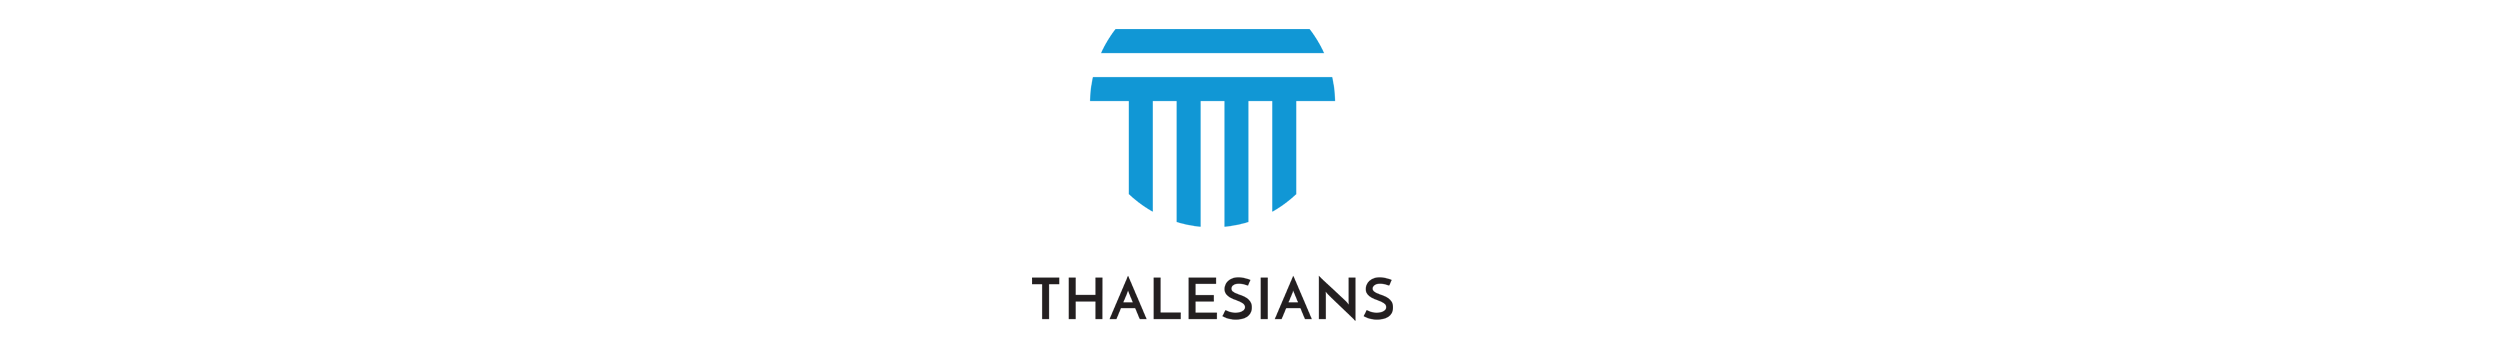

# Testing and troubleshooting

In [1]:
# Copyright (c) Thalesians Ltd, 2022. All rights reserved.
# Copyright (c) Paul Alexander Bilokon, 2022. All rights reserved.
# Author: Paul Alexander Bilokon <paul@thalesians.com>
# Version: 1.0 (2022.06.22)
# Email: info@thalesians.com

## Motivation

Once you have written and debugged your code in a Jupyter notebook, the code's life cycle is only just beginning. Chances are that you have developed some generally useful code, which will be used again and again in the future, by yourself and others.

Software, including that contained in Jupyter notebooks, is prone to **software rot**: "a slow deterioration of software quality over time or its diminishing responsiveness that will eventually lead to software becoming faulty, unusable, or in need of upgrade. This is not a physical phenomenon: the software does not actually decay, but rather suffers from a lack of being responsive and updated with respect to the changing environment in which it resides."

There are different kinds of software rot. **Dormant rot** affects the software that is not currently being used. It gradually becomes unusable as the remainder of the software environment changes. Changes in user requirements also contribute to the deterioration.

**Active rot** affects the software that is being continuously modified. It may lose its integrity over time if proper mitigating processes are not consistently applied.

**Refactoring** is a means of addressing the problem of software rot. It is described as the process of rewriting existing code to improve its structure without affecting its external behaviour.

Transforming Jupyter notebooks into generally useful libraries is a special kind of refactoring. 

Refactoring is greatly facilitated by **unit test** coverage: it is easier to improve the structure of the existing code without affecting its external behaviour if that external behaviour is clearly specified by the unit tests.

Refactoring is also facilitated by **design patterns**. Ad hoc code is rewritten using tried and tested designs to minimise the likelihood of it behaving incorrectly or causing unnecessary confusion.

In general, the code should follow the **principle of least astonishment (POLA)**, also called the **principle of least surprise**, which applies both to user interface and software design. A typical formulation of the principle, from 1984, is: "If a necessary feature has a high astonishment factor, it may be necessary to redesign the feature."

The task of writing a Jupyter notebook and the task of writing a generally useful library each have their idiosyncrasies. They are quite distinct.

The inner workings of a library may be relatively complex (but avoid the temptation to overcomplicate them; the developers will be the first people to suffer from excessive complexity), but the interfaces must be **easy to use correctly, difficult to use incorrectly** (this formulation is due to Martin Zinkin).

It is generally a good idea to follow the **KISS ("Keep It Simple, Stupid")** principle noted by the U.S. Navy in 1960. Wikipedia explain it as follows: "The KISS principle states that most systems work best if they are kept simple rather than made complicated; therefore simplicity should be a key goal in design, and unnecessary complexity should be avoided."

In software design this also takes the shape of the **DRY ("Don't Repeat Yourself")** principle aimed at reducing repetition of software patterns: "Every piece of knowledge must have a single, unambiguous, authoritative representation within a system". This applies to code, but also more broadly to "database schemas, test plans, the build system, even documentation".

## Structuring libraries

Suppose that we have been working on alpha generation. This work has resulted in some Jupyter notebooks, where we have managed to produce some viable trading signals. Our next goal is to streamline the alpha generation process for the future. We don't want to rewrite the same code many times over. We want to create a reusable, easy to use library.

This library won't live in the Jupyter notebook. It will occupy one or more `*.py` files. These `*.py` files can be imported into the Jupyter notebook using `import` in the same way as we import the standard modules, such as `math`, or third-party modules, such as `numpy`.

Let us create a directory named `mylib` in the same directory as this Jupyter notebook. In practice the directory may be located elsewhere. If it is located elsewhere on disc, we need to add it to the `PYTHONPATH` environment variable, which you can set to add additional directories where Python will look for modules and packages.

The `PYTHONPATH` directories are added to the list of directories that are accessible in Python via `sys.path`.

We can inspect `sys.path`:

In [1]:
import sys
sys.path

['/home/jovyan/Notebooks/group_i',
 '/opt/conda/lib/python37.zip',
 '/opt/conda/lib/python3.7',
 '/opt/conda/lib/python3.7/lib-dynload',
 '',
 '/opt/conda/lib/python3.7/site-packages',
 '/opt/conda/lib/python3.7/site-packages/IPython/extensions',
 '/home/jovyan/.ipython']

When Python is already running, we can even change `sys.path` dynamically by appending to this list.

Finally, when our library is production ready, we may choose to distribute it to the **Python Package Index (PyPI)**&mdash;a repository of software for the Python programming language. PyPI helps you find and install software developed and shared by the Python community. Package authors use PyPI to distribute their software.

You too can turn your Python libraries into PyPI packages. In this case other people will be able to install them using `pip`.

Libraries installed using `pip` are usually added to `Lib/site-packages` under the Python installation, which, as we can see above, is automatically added to `sys.path`, so there is no need to modify `PYTHONPATH` / `sys.path` for them.

For now, let us create a directory `mylib` in the same directory as the present notebook.

Let us try to import it.

In [2]:
import mylib

We see that nothing happens. When asked to import a directory, Python looks for the file `__init__` inside `mylib/`. If there is no such file, then nothing fill happen.

Let us create `__init__.py` inside the directory `mylib` and add a single line to it:

In [3]:
import mylib

Strange, nothing has happened. That is because Python does not reload the libraries that have already been loaded, even if they are re-imported. We need to use the following trick (which is very useful when debugging changing libraries from a Jupyter notebook) to reload the library:

In [4]:
import importlib
importlib.reload(mylib)

<module 'mylib' (namespace)>

Notice that this time round our `__init__.py` has been read and executed: we see the text `Module mylib loaded` above.

Let us now add some functions (we'll pretend that they are useful functions for now). The new `__init__.py` will be:

In [7]:
import importlib
importlib.reload(mylib)

Module mylib loaded


<module 'mylib' from '/home/jovyan/Notebooks/group_i/mylib/__init__.py'>

In [8]:
mylib.myadd(3, 5)

8

In [9]:
mylib.mysqrt(25)

5.0

Let us now add the file called `visual.py` to the directory `mylib`.

This "sub"-module can now be imported with

In [11]:
import mylib.visual

In general, when a module corresponds to a Python file, as `mylib.visual` corresponds to `mylib/visual.py`, that Python file is executed, and the variables and functions that it defines are added to the relevant scope (`mylib.visual.*` in this case). When it is a directory that corresponds to a module being imported, as, for example, `mylib` itself, it is `__init__.py` inside that directory that is executed, and the variables and functions that it defines are added to the relevant scope (`mylib.*` in this case).

In our example, while there is only one file in `mylib`, there was little point in creating `mylib/__init__.py` instead of just `mylib.py`, the latter would have worked. We have done this for illustrative purposes.

Python libraries can have a fairly sophisticated structure, consisting of multiple files contained in multiple nested directories, each directory with its own `__init__.py` file

If the user wants to bring the symbols into the global scope, they import the module with something like

In [12]:
from mylib import *

Now I can run directly

In [13]:
mysqrt(25)

5.0

## Documenting Python libraries

You have surely seen the professionally documented Python libraries, such as pandas: https://pandas.pydata.org/docs/

Such documentation is created using **Sphinx**&mdash;"a tool that makes it easy to create intelligent and beautiful documentation, written by Georg Brandl and licensed under the BSD license".

Sphinx uses reStructuredText (https://docutils.sourceforge.io/rst.html) as its markup language, and many of its strengths come from the power and straightforwardness of reStructuredText and its parsing and translating suite, the Docutils (https://docutils.sourceforge.io/).

To learn how to start documenting your Python libraries in Sphinx, see *First steps with Sphinx*: https://www.sphinx-doc.org/en/master/usage/quickstart.html

The process involves adding **docstrings** to your classes and functions in the following manner. Here is `mylib/__init__.py` with docstrings:

In [14]:
import math

def myadd(x, y):
    """Adds two numbers together and returns the result.
    
    :param x: The first number to add
    :type x: numeric
    :param y: The second number to add
    :type y: numeric
    :return: The sum of the two given numbers
    :rtype: numeric
    """
    return x + y

def mysqrt(x):
    """Takes the square root of a given number and returns the result.
    
    :param x: The number, whose square root is to be calculated.
    :type x: numeric
    :return: The square
    :rtype: numeric
    """
    return math.sqrt(x)

# Remove this when done debugging:
print('Module mylib loaded')

Module mylib loaded


To learn more about writing docstrings, see https://sphinx-rtd-tutorial.readthedocs.io/en/latest/docstrings.html

## Unit tests

When writing Python libraries it is a good idea to ensure that your code is covered by the **unit tests**. Unit testing is a level of software testing where individual units/components of the software are tested. The purpose is to validate that each unit of the software performs as designed.

Unit tests in Python are implemented using the `unittest` module.

For our simplistic example we will write the following unit test in `mylib/_testing.py`:

This unit test can be run as a standalone Python application:

We should see the following result:

The unit tests may or may not be shipped with the final library when it is installed, e.g. using `pip`.

## Doctests

Another useful form of testing in Python is **doctests**. The `doctest` module searches the docstrings for pieces of text that look like interactive Python sessions, and then executes those sessions to verify that they work exactly as shown. There are several common ways to use doctest:

* To check that a module's docstrings are up-to-date by verifying that all interactive examples still work as documented.

* To perform regression testing by verifying that interactive examples from a test file or a test object work as expected.

* To write tutorial documentation for a package, liberally illustrated with input-output examples. Depending on whether the examples or the expository text are emphasised, this has the flavour of "literate testing" or "executable documentation".

Here is how doctests can be incorporated into `mylib/__init__.py`:

The doctests can then be run using

## Distributing via PyPI

If you are thinking of open sourcing your code, you should consider a number of legal items, such as which license to use.

Once you are ready to ship the code, it's time to write `setup.py`.

Here is, for example, setup.py for the open source `thalesians.tsa` library:

You can then run

In [17]:
python setup.py sdist

SyntaxError: invalid syntax (<ipython-input-17-3aeb6e503625>, line 1)

This will create a `dist` sub-directory in your project, and will wrap-up all of your project's source code files into a distribution file, a compressed archive file in the form of `thalesians.tsa-0.3.tar.gz`.

You can then register your package with PyPI and upload your release to PyPI by following the steps outlined in https://the-hitchhikers-guide-to-packaging.readthedocs.io/en/latest/quickstart.html

## The best way to learn to write good libraries

...Is by reading the code of the existing good libraries.

If you have an Anaconda Python distribution, it is a good idea to peruse pandas and NumPy code living under `Lib/site-packages`. Or download the code for interesting libraries from GitHub.

## Further reading

For more information on refactoring, see

* Martin Fowler. *Refactoring: Improving the Design of Existing Code*, second edition. Addison Wesley, 2019.

POLA, as stated, first appeared in

* M. F. Cowlishaw. "The design of the REXX language". *IBM Systems Journal.* **23** (4): 333. https://www.cs.tufts.edu/~nr/cs257/archive/mike-cowlishaw/rexx.pdf

The DRY principle was formulated in

* Andrew Hunt, David Thomas. *The Pragmatic Programmer: From Journeyman to Master*. Addison-Wesley, 1999.

Other good books on software design include

* Robert C. Martin. *Clean Code: A Handbook of Agile Software Craftsmanship.* Prentice Hall, 2008.

* Steve McConnell. *Code Complete: A practical handbook of software construction*, second edition. Microsoft Press, 2004.

* Eric S. Raymond. *The Art of UNIX Programming.* Addison-Wesley, 2003.

* Jon Bentley. *Programming Pearls*, second edition. Pearson, 2006.

Good books specifically on object-oriented software design are

* Grady Booch, Robert A. Maksimchuk, Michael W. Engle, Bobbi J. Young, PhD, Jom Conallen, Kelli A. Houston. *Object-Oriented Analysis and Design with Applications*, third edition. Addison-Wesley, 2007.

* Arthur J. Riel. *Object-Oriented Design Heuristics.* Addison Wesley, 1996.

On design patterns:

* Erich Gamma, Richard Helm, Ralph Johnson, John Vlissides. *Design Patterns: Elements of Reusable Object-Oriented Software.* Addison-Wesley, 1994.

On applications of design patterns to quantitative finance:

* Mark S. Joshi. *C++ Design Patterns and Derivatives Pricing*, second edition. Cambridge University Press, 2008.

To learn about the Design Patterns on the example of QuantLib, see

* Dmitri Nesteruk. *C++ Design Patterns in QuantLib.* YouTube, 2016: https://youtu.be/F4CxCXnA48M